<a href="https://colab.research.google.com/github/franklinhamer2727/Apuntes-de-IA/blob/main/Comparacion_de_ID3_Y_C4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz


In [4]:
import os
print(os.listdir("/"))


['run', 'etc', 'bin', 'media', 'home', 'srv', 'var', 'lib', 'sbin', 'opt', 'tmp', 'usr', 'dev', 'mnt', 'lib64', 'boot', 'root', 'proc', 'sys', 'content', '.dockerenv', 'tools', 'datalab', 'python-apt', 'lib32', 'NGC-DL-CONTAINER-LICENSE']


In [28]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
df.drop(['SkinThickness'], axis=1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [41]:
df = df[(df[['Glucose','BloodPressure','Insulin', 'BMI','DiabetesPedigreeFunction','Age']] != 0).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [33]:
split_data = train_test_split(df,test_size=.30)
train_data = split_data[0]
test_data = split_data[1]


In [34]:
outcome_train = train_data.Outcome.tolist()
outcome_test = test_data.Outcome.tolist()

In [37]:
train_data_remove = train_data.drop(columns="Outcome")
test_data_remove = test_data.drop(columns="Outcome")


In [38]:
# ID3
clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(train_data_remove,outcome_train)

DecisionTreeClassifier(criterion='entropy')

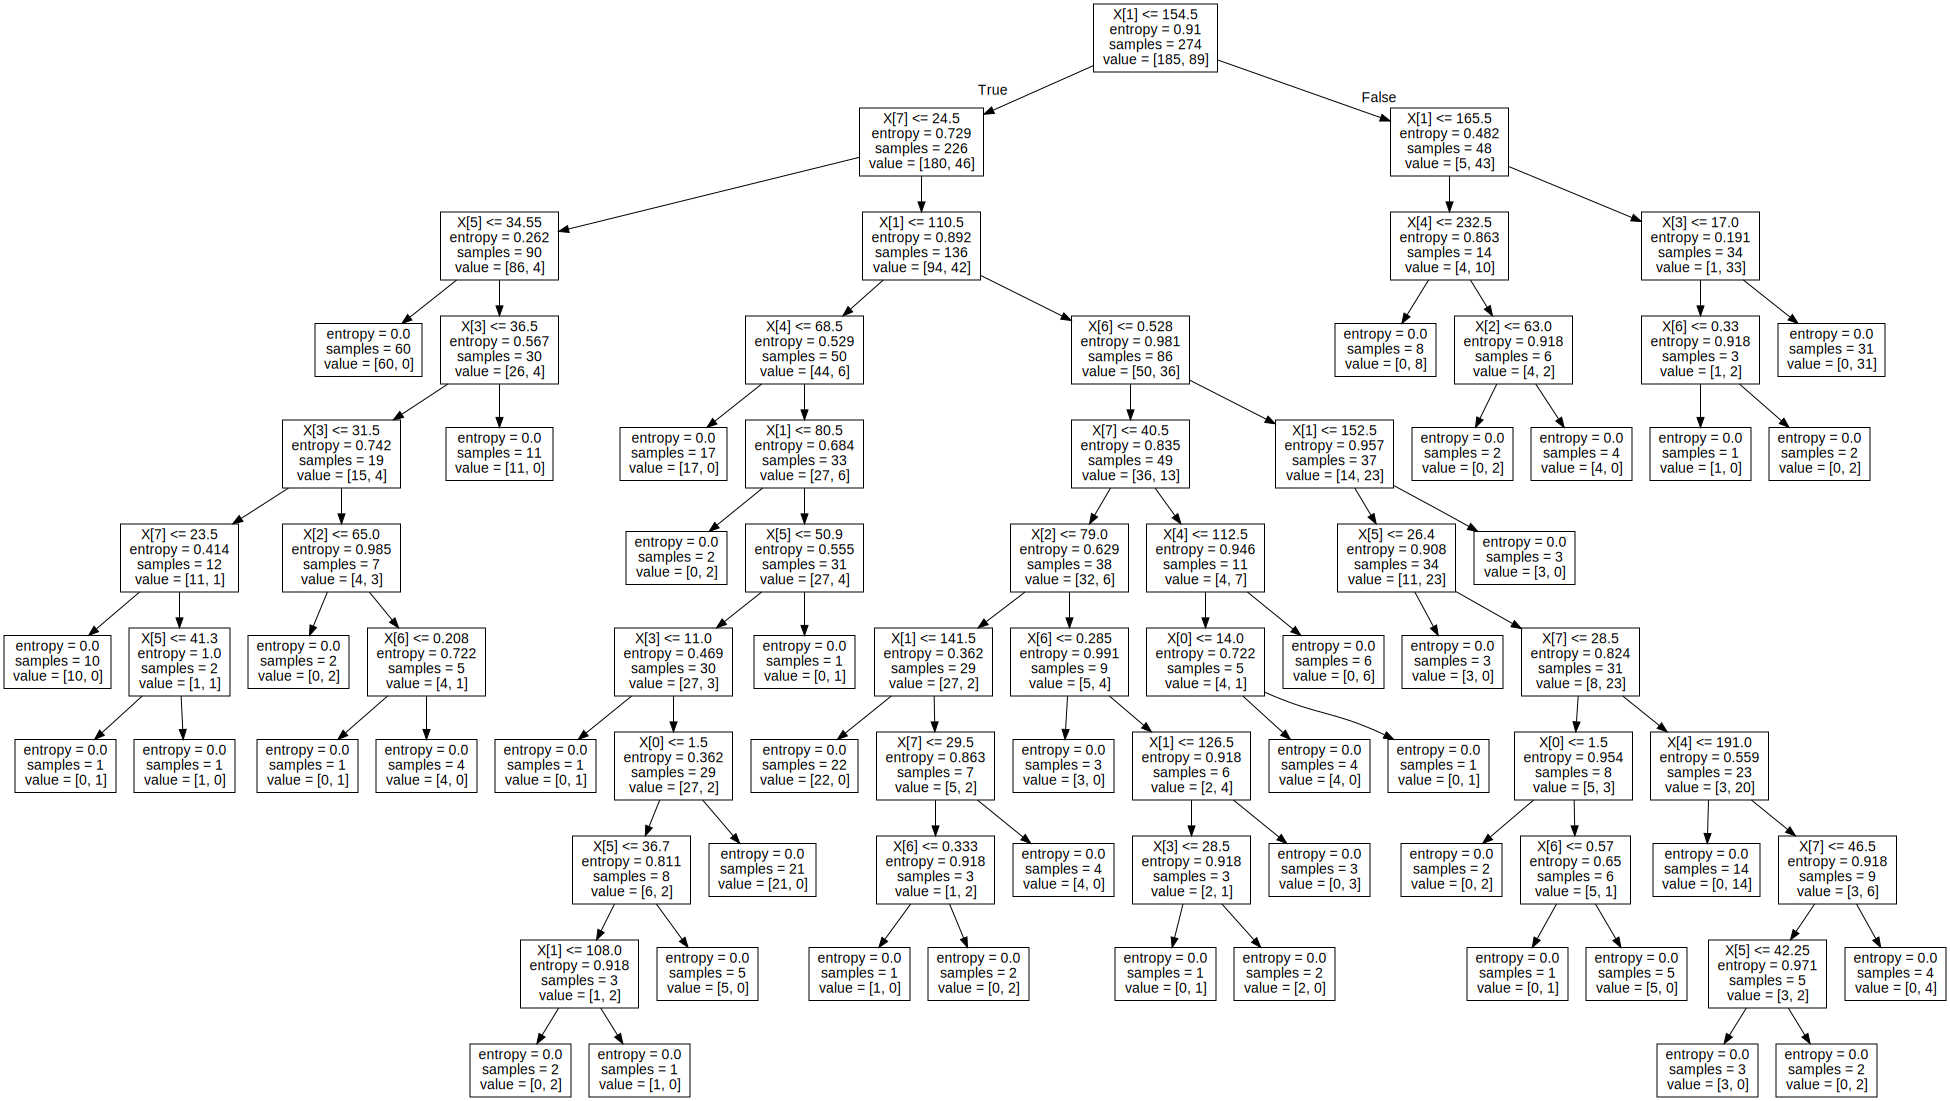

In [39]:
dot_data = tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render('Diabetes')
graph

In [40]:
test_array = clf.predict(test_data_remove).tolist()
ID3TestAccurracy = sklearn.metrics.accuracy_score(outcome_test,test_array)
print('ID3 testing accurracy',ID3TestAccurracy)

ID3 testing accurracy 0.6271186440677966


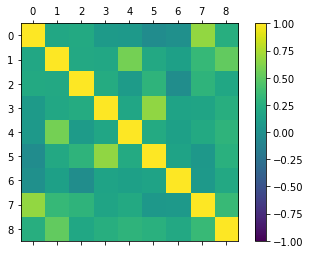

In [42]:
correlation = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin= -1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [44]:
train_array = clf.predict(train_data_remove).tolist()
ID3TestAccurracy = sklearn.metrics.accuracy_score(outcome_train, train_array)
print('ID3 training accuracy',ID3TestAccurracy)

ID3 training accuracy 1.0


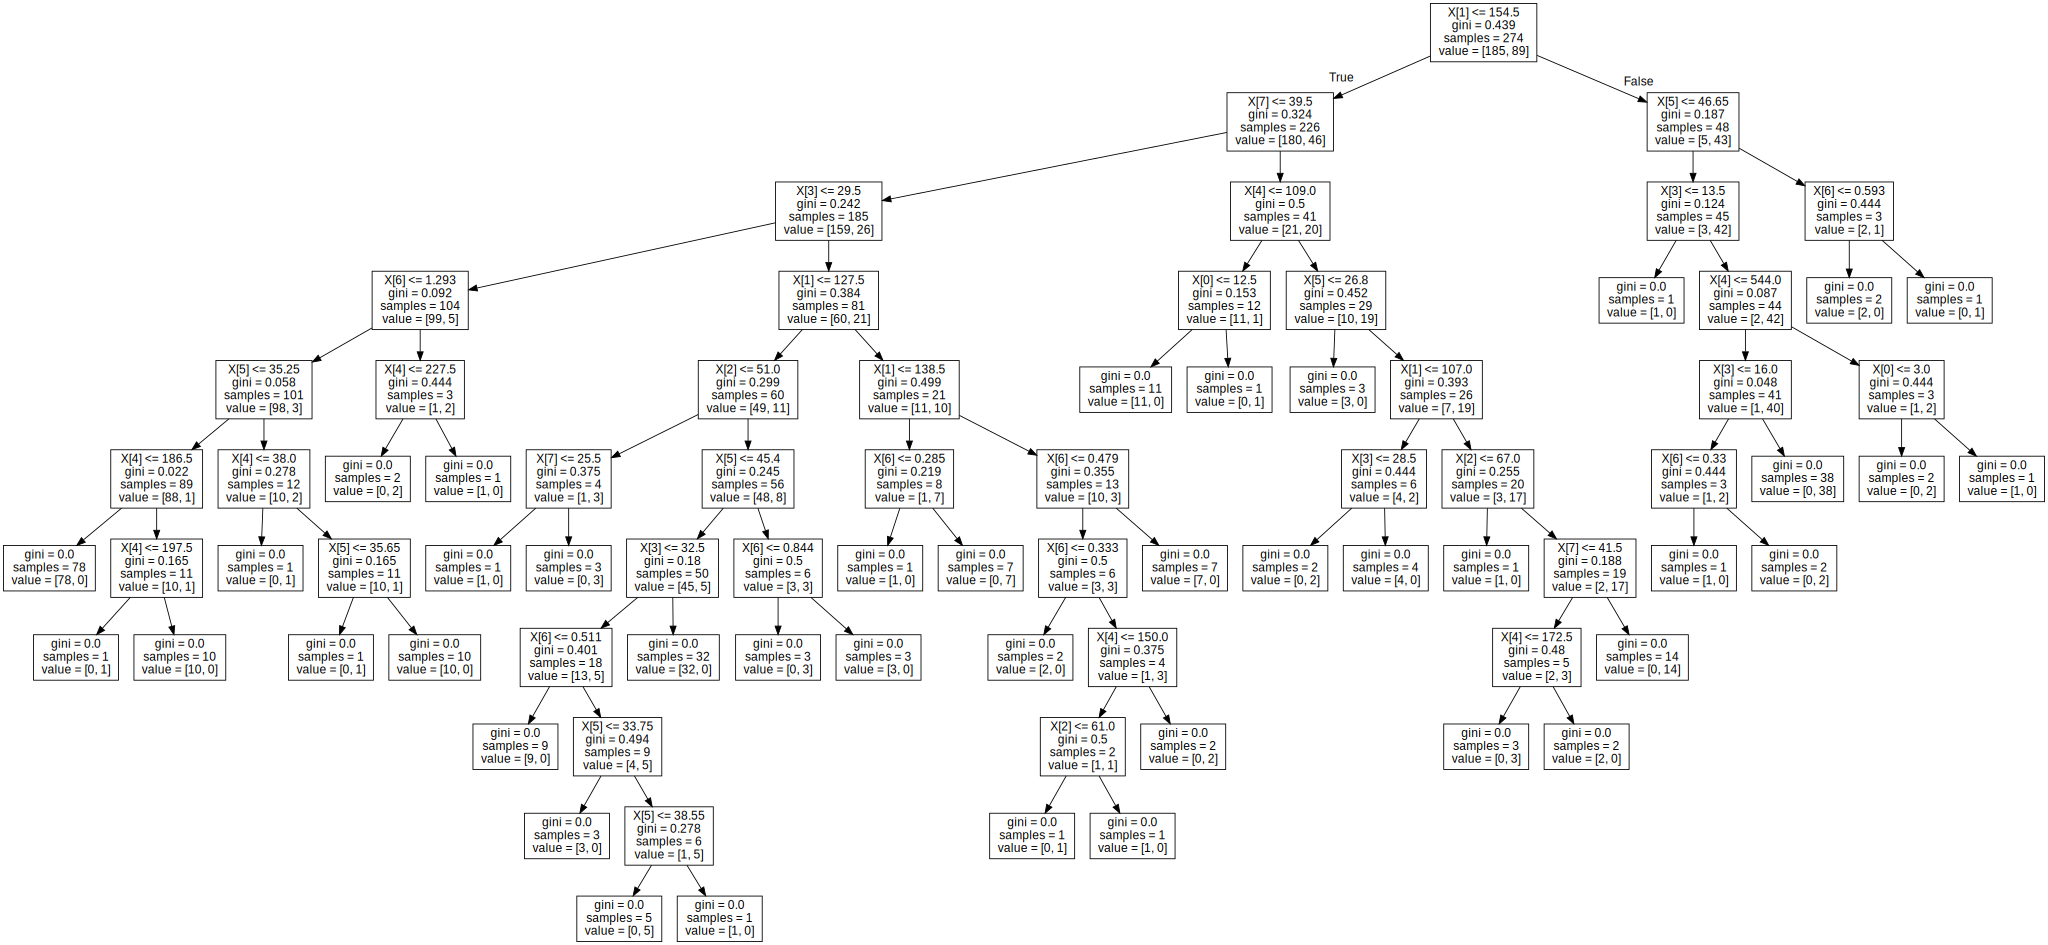

In [45]:
# C4.5
clf2 = sklearn.tree.DecisionTreeClassifier()

clf2.fit(train_data_remove, outcome_train)

dot_data = tree.export_graphviz(clf2, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Diabetes")

graph

In [46]:
test_array2 = clf2.predict(test_data_remove).tolist()
CTestAccuracy = sklearn.metrics.accuracy_score(outcome_test, test_array2)

print('C4.5 Testing accuracy: ',CTestAccuracy)

C4.5 Testing accuracy:  0.7372881355932204


In [47]:
train_array2 = clf2.predict(train_data_remove).tolist()

CTrainAccuracy = sklearn.metrics.accuracy_score(outcome_train, train_array2)

print('C4.5 Training accuracy: ', CTrainAccuracy)

C4.5 Training accuracy:  1.0
